# Trafic Light Classificator

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
%matplotlib inline
fig = plt.figure()


In [10]:
file = cv2.imread('sim_images/frame000000.png')
#new_file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);


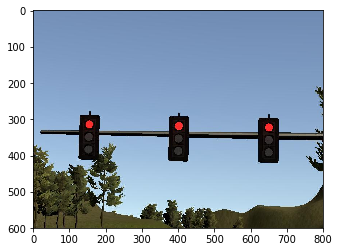

In [12]:
#plt.imshow(file)
#file

## 1. Data Import

In [5]:
X_train = []
x_label = []
for img_class, directory in enumerate(['sim_red_Crop', 'sim_yellow_Crop', 'sim_green_Crop', 'none']):
    for i, file_name in enumerate(glob.glob("{}/*.jpg".format(directory))):
        file = cv2.imread(file_name)
        file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);
        resized = cv2.resize(file, (32,32))

        X_train.append(resized/255.0-0.5)
        x_label.append(img_class)
        
        #if (i < 3):
        #    plt.imshow(rgb)
        #    plt.show()
        
X_train = np.array(X_train)
x_label = np.array(x_label)

In [6]:
x_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,

## 2. CNN

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Activation
from keras.utils.np_utils import to_categorical
from keras import losses, optimizers, regularizers

In [8]:
categorical_labels = to_categorical(x_label)

In [9]:
# num_classes = 4
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(64, 32, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(MaxPooling2D(2,2))
# Dropout(0.8)
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(MaxPooling2D(2,2))
# Dropout(0.8)
# model.add(Flatten())

# #model.add(Dense(128, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(8, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(num_classes, activation='softmax'))

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4))
model.add(Activation('softmax'))

In [10]:
loss = losses.categorical_crossentropy
optimizer = optimizers.Adam()

In [11]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [12]:
model.fit(X_train, categorical_labels, batch_size=32, epochs=30, verbose=True, validation_split=0.1, shuffle=True)

Train on 330 samples, validate on 37 samples
Epoch 1/30
330/330 [==============================] - 0s - loss: 1.1682 - acc: 0.4879 - val_loss: 1.0823 - val_acc: 0.5135
Epoch 2/30
330/330 [==============================] - 0s - loss: 0.7611 - acc: 0.7758 - val_loss: 1.3295 - val_acc: 0.1892
Epoch 3/30
330/330 [==============================] - 0s - loss: 0.4572 - acc: 0.8818 - val_loss: 0.8389 - val_acc: 0.7297
Epoch 4/30
330/330 [==============================] - 0s - loss: 0.2604 - acc: 0.9667 - val_loss: 1.1368 - val_acc: 0.6216
Epoch 5/30
330/330 [==============================] - 0s - loss: 0.1741 - acc: 0.9667 - val_loss: 0.5332 - val_acc: 0.8649
Epoch 6/30
330/330 [==============================] - 0s - loss: 0.1238 - acc: 0.9818 - val_loss: 0.8248 - val_acc: 0.7297
Epoch 7/30
330/330 [==============================] - 0s - loss: 0.0913 - acc: 0.9848 - val_loss: 0.6352 - val_acc: 0.8378
Epoch 8/30
330/330 [==============================] - 0s - loss: 0.0783 - acc: 0.9848 - val_lo

In [13]:
score = model.evaluate(X_train, categorical_labels, verbose=0)

In [14]:
print(score)

[0.0878763514131876, 0.9673024528033077]


In [15]:
prediction = model.predict(X_train, verbose=1)
for i in range(len(prediction)):
    print (i, prediction[i], categorical_labels[i])

 32/367 [=>............................] - ETA: 0s0 [9.9928492e-01 5.1851704e-04 1.8786475e-04 8.7346189e-06] [1. 0. 0. 0.]
1 [0.99481505 0.00146894 0.00120846 0.00250757] [1. 0. 0. 0.]
2 [9.9928313e-01 5.1986543e-04 1.8820621e-04 8.7495428e-06] [1. 0. 0. 0.]
3 [0.99481505 0.00146894 0.00120846 0.00250757] [1. 0. 0. 0.]
4 [0.99481505 0.00146894 0.00120846 0.00250757] [1. 0. 0. 0.]
5 [9.9928492e-01 5.1851704e-04 1.8786475e-04 8.7346189e-06] [1. 0. 0. 0.]
6 [0.99481505 0.00146894 0.00120846 0.00250757] [1. 0. 0. 0.]
7 [0.9948161  0.00146676 0.00121025 0.00250688] [1. 0. 0. 0.]
8 [0.99481505 0.00146894 0.00120846 0.00250757] [1. 0. 0. 0.]
9 [9.9917585e-01 3.4544061e-04 4.7390175e-04 4.7592011e-06] [1. 0. 0. 0.]
10 [9.9953628e-01 1.0768036e-04 3.5342589e-04 2.6943576e-06] [1. 0. 0. 0.]
11 [9.9980134e-01 1.5723523e-05 1.2922641e-04 5.3774882e-05] [1. 0. 0. 0.]
12 [9.9928099e-01 1.3696247e-04 5.8071845e-04 1.3948610e-06] [1. 0. 0. 0.]
13 [9.9925596e-01 2.6867574e-04 4.7252467e-04 2.8167583e-

138 [9.9888319e-01 3.5996469e-05 1.0792866e-03 1.4795472e-06] [1. 0. 0. 0.]
139 [9.9657959e-01 4.4803391e-04 1.3455086e-04 2.8377564e-03] [1. 0. 0. 0.]
140 [9.9707139e-01 1.8667383e-04 1.3950019e-04 2.6024166e-03] [1. 0. 0. 0.]
141 [9.8956645e-01 3.2650630e-04 2.4341622e-04 9.8637417e-03] [1. 0. 0. 0.]
142 [9.982316e-01 8.853436e-04 8.184154e-05 8.012708e-04] [1. 0. 0. 0.]
143 [9.9482924e-01 5.4999522e-04 1.4951098e-04 4.4711907e-03] [1. 0. 0. 0.]
144 [9.9976772e-01 8.8219924e-05 1.2973712e-04 1.4299494e-05] [1. 0. 0. 0.]
145 [9.99434173e-01 1.13402175e-05 5.53587335e-04 8.80613925e-07] [1. 0. 0. 0.]
146 [9.9871039e-01 9.0023759e-06 1.2796141e-03 1.0544127e-06] [1. 0. 0. 0.]
147 [9.9932265e-01 1.8742936e-05 6.5108167e-04 7.5344637e-06] [1. 0. 0. 0.]
148 [9.9890935e-01 4.8648767e-06 1.0847764e-03 9.8894600e-07] [1. 0. 0. 0.]
149 [9.9920481e-01 1.0221332e-05 7.8229810e-04 2.6769931e-06] [1. 0. 0. 0.]
150 [9.9978834e-01 1.3074257e-05 1.9398931e-04 4.5509232e-06] [1. 0. 0. 0.]
151 [7.82028

In [18]:
import h5py
model.save('classifier_sim.h5')

In [17]:
file = cv2.imread('sim_red_Crop/frame000513.jpg')
file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);
file.shape
resized = cv2.resize(file, (32,32))
resized = resized/255.0-0.5
prediction = model.predict(resized.reshape((1, 32, 32, 3)))
prediction[0].tolist().index(max(prediction[0]))
#plt.imshow(file)

0